## Ejercicio Semanal - Tipos de Clientes

Te encargarás de categorizar a algunos de tus clientes en base a datos históricos. No hay noción de qué tipo de clientes hay. ¡Se le pide que lo averigüe!

* cargar datos / customers.csv
* recuerde que la transformación y la normalización pueden ayudar.
* ¿Hay valores atípicos?
* considere usar PCA para reducir las dimensiones
* Utilice k-means para crear los grupos que le resulten más útiles.
* Utilice visualizaciones para describir sus grupos.

Cuales grupos hizo y porque? Esto lo discutimos en clase!

### Atributos:

- FRESH: gasto anual (m.u.) en productos frescos (Continuo);
- LECHE: gasto anual (m.u.) en productos lácteos (Continuo);
- ALIMENTOS: gasto anual (m.u.) en productos alimenticios (Continuo);
- CONGELADOS: gasto anual (m.u.) en productos congelados (Continuo)
- DETERGENTS_PAPER: gasto anual (m.u.) en detergentes y productos de papel (Continuo)
- DELICATESSEN: gasto anual (m.u.) en productos delicatessen (Continuo);
- CANAL: Canal de clientes - Horeca (Hotel / Restaurante / Cafetería) o Canal Minorista (Nominal)
- REGIÓN: clientes Región Lisnon, Oporto u Otro (Nominal)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
data = pd.read_csv("data/customers.csv")
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [13]:
data['total_spends'] = data['Fresh'] + data['Milk'] + data['Grocery'] + data['Frozen'] + data['Detergents_Paper'] + data['Delicassen']
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,total_spends
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302
436,1,3,39228,1431,764,4510,93,2346,48372
437,2,3,14531,15488,30243,437,14841,1867,77407
438,1,3,10290,1981,2232,1038,168,2125,17834


# Obtener valor de K

[462549244870.7799, 259253976501.92776, 162229332046.85703, 131589953572.8099, 105168093122.49847, 88403275499.99048, 76528691717.5222, 67002221168.57092, 59488303616.30729]


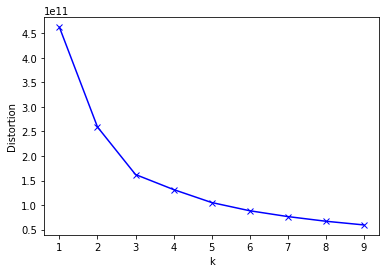

In [14]:
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(data)
    distortions.append(model.inertia_)
    
print(distortions)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [15]:
pca = decomposition.PCA(n_components=3)
X = pca.fit_transform(data)

In [16]:
model = KMeans(n_clusters=3,init="k-means++")
predictions = model.fit_predict(X)

In [17]:
clusters = pd.DataFrame(data=X,columns=['Component1','Component2','Component3'])
clusters['class']=predictions

In [18]:
clusters

,Component1,Component2,Component3,class
0,1428.322978,-590.329546,-882.319301,1
1,-86.617405,-5996.216514,1152.050155,1
2,2457.570786,-5446.703163,4279.787537,1
3,-6796.997959,5084.683938,2186.585664,1
4,14243.889358,8992.242576,-58.102319,0
...,...,...,...,...
435,44404.768741,9568.801079,4868.597264,0
436,17973.602636,26702.925989,-3701.027549,0
437,49039.004780,-15363.198010,-7206.890597,0
438,-16888.498670,3140.926636,-431.736228,1


In [19]:
fig = px.scatter_3d(clusters, x='Component1', y='Component2', z='Component3',
              color='class')
fig.show()

A este punto tenemos un dataset etiquetado y podemos analizarlo mejor

In [20]:
data['class']= predictions

class_0 = data[data['class']==0]
class_1 = data[data['class']==1]
class_2 = data[data['class']==2]

In [30]:
fig = px.scatter(data, y="total_spends", color="class",title="Customers total spends by class",
                labels={
                     "total_spends": "Total gatado al año",
                     "index": "",
                     "class": "Clases"
                 })
fig.show()

# Conclusiones del analisis

Como se puede observar tanto en el gráfico 3D como en el 2D se generaron 3 grandes grupos de clientes los cuáles podemos catalogar como:

 - Compradores menores: Los cuáles gastan usualmente menos de 50K al año, podrían tratarse de familias de pequeñas a   medianas.
 
 - Compradores medianos: Los cuáles gastan de 50K a 100K al año aproximadamente podrían en este caso tratarse de familias de medianas a grandes así como pequeños negocios de comida.
 
 - Grandes compradores: Los cuáles tienden a gastar mas de 100K al año los cuáles es muy probable que se traten de restaurantes o negocios de comida grandes.
